In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import scipy
import scipy.linalg as linalg
np.set_printoptions(precision=2,suppress=True)

````{tikz}
\begin{tikzpicture}
\begin{axis}[
width=\textwidth,
xlabel=$x_1$, % label x axis
ylabel=$y$, % label y axis
axis lines=left, %set the position of the axes
xmin=0, xmax=7, % set the min and max values of the x-axis
domain=0:6,
ymax=12, % set the min and max values of the y-axis
legend pos=outer north east]
\addplot [only marks, black, mark = *] 
coordinates {
(5,2)
(3,5)
(1,3)
};
\addplot+[magenta,thick,smooth, mark=none]
{x^3-(5/8+9)*x^2+(7/2+23)*x+1/8-15};
\addplot+[blue,thick,smooth, mark=none]
{x^3/2-(5/8+9/2)*x^2+(7/2+23/2)*x+1/8-15/2};
\addplot+[green,thick,smooth, mark=none]
{x^3/4-(5/8+9/4)*x^2+(7/2+23/4)*x+1/8-15/4};
\end{axis}
\end{tikzpicture}
````

In [44]:
# calculations invisible
D = np.array([5,3,1])
y = np.array([2,5,3])
def ϕ(x):
    return np.row_stack((np.ones(x.shape[0]),x, x**2, x**3))
X=ϕ(D).T
print(X.T@X,X.T@y)
A = X.T@X
b = X.T@y
A1=np.vstack((A[0,:]/3,A[1,:]-A[0,:]*3, A[2,:] - A[0,:]/3*35, A[3,:] - A[0,:]/3*153))
b1=np.vstack((b[0]/3,b[1]-b[0]*3, b[2] - b[0]/3*35, b[3] - b[0]/3*153))
A1,b1
A2=np.vstack((A1[0,:],A1[1,:]/8, A1[2,:] - A1[1,:]/8*48, A1[3,:] - A1[1,:]/8*248))
b2 = np.vstack((b1[0],b1[1]/8, b1[2] - b1[1]/8*48, b1[3] - b1[1]/8*248))
A2,b2
A3=np.vstack((A2[0,:],A2[1,:], A2[2,:]/A2[2,2], A2[3,:] - A2[2,:]/A2[2,2]*96))
b3=np.vstack((b2[0],b2[1], b2[2]/A2[2,2], b2[3] - b2[2]/A2[2,2]*96))
A3,b3

[[    3.     9.    35.   153.]
 [    9.    35.   153.   707.]
 [   35.   153.   707.  3369.]
 [  153.   707.  3369. 16355.]] [ 10.  28.  98. 388.]


(array([[ 1.  ,  3.  , 11.67, 51.  ],
        [ 0.  ,  1.  ,  6.  , 31.  ],
        [ 0.  ,  0.  ,  1.  ,  9.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ]]),
 array([[ 3.33],
        [-0.25],
        [-0.62],
        [-0.  ]]))

## Overparameterized Regression ($p>n$)

<!-- Getting all Regression Solvers -->
If the matrix $X^\top X$ is not invertible, then we have infinitely many regression solvers. This is particularly the case when $p>n$.

````{prf:example} Regression with $p>n$
:label: example_reg_p_larger_n
We consider a toy regression task, where the data is given by following three data points (observations) of one feature.

    D = np.array([5,3,1])
    y = np.array([2,5,3])
    pandas.DataFrame({"x1":D,"y":y})

That is, our given data looks as follows:
 
 $x$ | $y$ 
----------------|----------------
5 | 2 
3 | 5 
1 | 3 

We fit a polynomial of degree $k=3$. For polynomial regression functions $f:\mathbb{R}\rightarrow\mathbb{R}$ we have
$$f(x) = \beta_0 +\beta_1 x+ \beta_2x^2 + \beta_3x^3 = \phi(x)^\top\bm\beta,$$
where 
$$\bm\phi(x)^\top=\begin{pmatrix}1& x& x^2& x^3\end{pmatrix}.$$
The design matrix gathers the transposed feature vectors of the data matrix:
$$X = \begin{pmatrix} \phi^\top(5)\\ \phi^\top(3)\\ \phi^\top(1)\end{pmatrix} = \begin{pmatrix} 1 & 5 & 25 & 125\\ 1 & 3 & 9 & 27\\ 1 & 1 & 1 & 1\end{pmatrix}$$
We have $n=3$ observations of $p=4$ features in the design matrix, and hence, $p>n$.

We have to solve the system of equations given by $X^\top X \bm\beta = X^\top \vvec{y}$:
\begin{align*}
\begin{pmatrix}
3 &     9 &    35 &   153\\
9 &    35 &   153 &   707\\
35&   153 &   707 &  3369\\
153&  707 &  3369 & 16355
\end{pmatrix} \bm\beta = 
\begin{pmatrix}
10\\  28\\  98\\ 388
\end{pmatrix}
\end{align*}
We can solve this system of equations by hand. There are multiple ways to do this. One is to transform the equations above into an upper triangle form. We detail the steps to do this in {ref}`reg_exercises`. As a solution set of regression solvers in dependence of $\beta_3$, we get 
$$\left\{\beta = \begin{pmatrix}\frac{1}{8}-15\beta_3\\3.5 +23\beta_3\\-\frac{5}{8} -9\beta_3\\\beta_3 \end{pmatrix} \mid \beta_3\in\mathbb{R} \right\}.$$
```{tikz}
\begin{tikzpicture}
\begin{axis}[
width=.8\textwidth,
xlabel=$x_1$, % label x axis
ylabel=$y$, % label y axis
axis lines=left, %set the position of the axes
xmin=0, xmax=7, % set the min and max values of the x-axis
domain=0:6,
ymax=12, % set the min and max values of the y-axis
legend pos=outer north east]
\addplot+[only marks, black, mark = *] 
coordinates {
(5,2)
(3,5)
(1,3)
};
\addlegendentry{Data Points}
\addplot+[magenta,thick,smooth, mark=none]
{x^3-(5/8+9)*x^2+(7/2+23)*x+1/8-15};
\addlegendentry{$\beta_3=1$}
\addplot+[blue,thick,smooth, mark=none]
{x^3/2-(5/8+9/2)*x^2+(7/2+23/2)*x+1/8-15/2};
\addlegendentry{$\beta_3=0.5$}
\addplot+[green,thick,smooth, mark=none]
{x^3/4-(5/8+9/4)*x^2+(7/2+23/4)*x+1/8-15/4};
\addlegendentry{$\beta_3=0.25$}
\end{axis}
\end{tikzpicture}
```
````
In the example above, we could compute the set of regression vectors by hand, but how can we compute the set of regression vectors when the dataset bigger? How can we numerically compute the set of all regression vectors?

In this case ($p>n$), the matrix $X^\top X$ is not invertible. When you try to compute the inverse of $X^\top X$ by hand, then you will get a contradiction. If we compute the inverse numerically with `np.linalg.inv(X.T@X)`, then you will see that the computed "inverse" has extremely large values (in the scope of $10^13$ to $10^14$). This corresponds to the fact that we are trying to divide by zero (in a matrix way). Generally, you can assume that such extreme values (either being very close to zero like `1e-16` or very big like `1e16`) indicates values that are actually equal to infinity or equal to zero.

Anyways, we can easily check how good the computed inverse is, by multiplying the "inverse" with the matrix itself. The multiplication of the computed inverse and the matrix itself should return an approximate identity matrix. However, if we check `np.linalg.inv(X.T@X)@(X.T@X)`, then we see that this matrix is nowhere near the identity matrix.

In turn, what mostly works is to use a numerical solver for the system of linear equations which returns the global minimizers $\beta$ of the regression objective
$$\{\beta\in\mathbb{R}^p\mid X^\top X\beta = X^\top y\}.$$

With `β = linalg.solve(X.T@X,X.T@y)` yields a solution for $\beta$, but returns a warning that the result might not be accurate. We observe that this result is accurate and by checking if $X^\top X\beta = X^\top y$. You can do this  by inspecting `X.T@X@β, X.T@y`, which indeed returns the same vector.  

### Characterizing the Set of Regression Solvers with SVD
We derive now a general solution for the (set of) regression solvers.
to do so, we have a look into the SVD of $X$, that gives us more insight into the regression equation when $X^\top X$ is not invertible. You might remember from the linear algebra recap, that the invertibility of a matrix is determined by the singular values of the matrix: if all the singular values are larger than zero, then the matrix is invertible, otherwise not. The singular values of $X^\top X$ are determined by the singular values of $X=U\Sigma V^\top$, since we have
\begin{align*}
    X^\top X = V\Sigma^\top \underbrace{U^\top U}_{=I} \Sigma V^\top = V\Sigma^\top \Sigma V^\top.
\end{align*}

 The singular value decomposition is uniquely defined and the decomposition $V\Sigma^\top \Sigma V^\top$ satisfies the requirements for the singular value decomposition of $X^\top X$. Hence, the singular values of $X^\top X$ are given by the diagonal elements of the matrix $\Sigma^\top \Sigma$. Let $r$ be the rank of the matrix $X$, that is the number of nonzero singular values. If $n<p$, then we know that $r\leq n$. That is, the matrix $\Sigma$ looks like
\begin{align}
\Sigma= 
\left(
\begin{array}{c:r}
\begin{matrix}
\sigma_1 & \ldots & 0  \\
\vdots  & \ddots  & \vdots \\
0 & \ldots   & \sigma_r \\
& \vvec{0} &
\end{matrix} & \vvec{0}
\end{array}
\right) 
= \left(
\begin{array}{c:r}
\begin{matrix}\Sigma_r\\\vvec{0}\end{matrix} & \vvec{0} \\ 
\end{array}
\right).
\label{eq:STS}
\end{align}

Given the singular value decomposition of $X$, we can try to solve Eq. {eq}`eq:minimizers` for $\bm\beta$:
\begin{align}
   X^\top X\bm{\beta} &= X^\top \vvec{y} \quad 
   \Leftrightarrow \quad V\Sigma^\top\Sigma V^\top \bm{\beta}= V\Sigma^\top U^\top\vvec{y}
   \quad 
   \Leftrightarrow \quad \Sigma^\top\Sigma V^\top \bm{\beta}= \Sigma^\top U^\top\vvec{y}, \label{eq:beta1}
\end{align}
where the last equality follows from multiplying with $V^\top$ from the left.

````{prf:observation} Characterization of Regression solvers by SVD
The global minimizers $\bm{\beta}$ to the {ref}`Linear Regression<regr_task>` task with design matrix $X$, having the SVD $X=U\Sigma V^\top$, are given by
$$\{\bm{\beta}\in\mathbb{R}^p\mid \Sigma^\top\Sigma V^\top \bm{\beta}= \Sigma^\top U^\top\vvec{y} \}.$$
````
$\Sigma^\top\Sigma\in\mathbb{R}^{p\times p}$ is a diagonal matrix, where not all elements on the diagonal are nonzero if $n<p$. Hence, it does **not** have an inverse if $n<p$. This becomes maye a bit more clear when we look at the following observation

(obs:sigma_r)=
````{prf:observation} Singular value matrix of rank $r$
Let $X\in\mathbb{R}^{n\times p}$ be a matrix with rank $r$, meaning that $X$ has only $r$ nonzero singular values. Let $X=U\Sigma V^\top$ be the SVD of $X$, then the matrix $\Sigma$ looks as follows:
\begin{align*}
\Sigma= 
\left(
\begin{array}{c:r}
\begin{matrix}
\sigma_1 & \ldots & 0  \\
\vdots  & \ddots  & \vdots \\
0 & \ldots   & \sigma_r \\
& \vvec{0} &
\end{matrix} & \vvec{0}
\end{array}
\right) 
= \left(
\begin{array}{c:r}
\begin{matrix}\Sigma_r\\\vvec{0}\end{matrix} & \vvec{0} \\ 
\end{array}
\right).
\end{align*}
The matrices $\vvec{0}$ indicate here constant zero matrices whose dimensionalities are inferred from context. The constant zero matrix below $\Sigma_r$ has a dimensionality of $n-r\times r$ and the constant zero matrix on the right has a dimensionality of $n\times p-r$. Correspondingly, if $n=r$, then the lower zero matrix doesn't exist and if $r=p$, then the zero matrix on the right doesn't exist. 
````
The notation of Observation {ref}`obs:sigma_r` helps us now to derive the set of all regression solvers.

````{prf:theorem} Set of all regression solvers
Let $X=U\Sigma V^\top\in\mathbb{R}^{n\times p}$ be the SVD of the design matrix of the {ref}`Linear Regression<regr_task>` task. If only $r<p$ singular values of $X$ are nonzero ($X$ has a rank of $r$), then the set of global minimizers $\bm{\beta}$ is given by
$$\left\{\bm{\beta}= V\begin{pmatrix}\Sigma_r^{-1} U_r^\top\vvec{y}\\z\end{pmatrix}\mid z\in\mathbb{R}^{p-r} \right\}.$$
$\Sigma_r$ denotes here the matrix containing only the first $r$ rows and columns of the singular values matrix $\Sigma$ and $U_r$ denotes the matrix containing the first $r$ left singular vectors (the first $r$ columns of $U$).
````
````{toggle}
```{prf:proof}
We start at the characterization of regression solvers by SVD (Observation):
\begin{align}
\Sigma^\top\Sigma V^\top\bm\beta &= \Sigma^\top U_r^\top y\\
\Leftrightarrow
\left(\begin{array}{cc}
\begin{matrix}
\Sigma_r&\vvec{0}\end{matrix} \\\hdashline \vvec{0} 
\end{array}\right)
\left(
\begin{array}{c:r}
\begin{matrix}\Sigma_r\\\vvec{0}\end{matrix} & \vvec{0} \\ 
\end{array}
\right)
V^\top \bm\beta &=  \left(\begin{array}{cc}
\begin{matrix}
\Sigma_r&\vvec{0}\end{matrix} \\\hdashline \vvec{0} 
\end{array}\right) U_r^\top y
\end{align}
We see here that only the first $r$ equations are relevant, the remaining equations $0=0$ are evidently true. We further shorten the notation by setting $\hat{\bm\beta}=V^\top\bm\beta$. We have then
\begin{align}
\Sigma_r\begin{pmatrix} \Sigma_r & \vvec{0}\end{pmatrix}\hat{\bm\beta} &= \Sigma_r U_r^\top y\\ 
\Leftrightarrow
\begin{pmatrix} \Sigma_r & \vvec{0}\end{pmatrix}\hat{\bm\beta} &= U_r^\top y\\ 
\Leftrightarrow
\begin{pmatrix} I_r & \vvec{0}\end{pmatrix}\hat{\bm\beta} &= \Sigma_r^{-1} U_r^\top y\\
\Leftrightarrow
\hat{\bm\beta}_{0:r} &= \Sigma_r^{-1} U_r^\top y
\end{align}
We see that only the first $r$ coordinates of $\hat{\bm\beta}$ are determined by the given equation. What we have in the rest of the coordinates is free to choose and the equation will still hold. We model the coordinates that are free to choose with the vector $z$. Then we have

\begin{align}
\hat{\bm\beta} &= \begin{pmatrix}\Sigma_r^{-1} U_r^\top y\\z \end{pmatrix}\\
\Leftrightarrow V^\top\bm\beta &= \begin{pmatrix}\Sigma_r^{-1} U_r^\top y\\z \end{pmatrix}\\
\Leftrightarrow \bm\beta &= V\begin{pmatrix}\Sigma_r^{-1} U_r^\top y\\z \end{pmatrix}
\end{align}

```
````

## Example Determination of Regression Solvers by SVD
We consider again the data from {prf:ref}`example_reg_p_larger_n`. Yet, instead of computing the solution by hand, we implement now a general scheme to obtain the set of regression vectors. First, we compute the SVD of the design matrix $X$

In [3]:
D = np.array([5,3,1])
y = np.array([2,5,3])
def ϕ(x):
    return np.row_stack((np.ones(x.shape[0]),x, x**2, x**3))
X=ϕ(D).T
U,σs,Vt = linalg.svd(X, full_matrices=True)
V=Vt.T

(3, 3) (3,) (4, 4)


When we look at the singular values, then we have $r=3<4=p$.

In [4]:
σs

array([130.7 ,   4.2 ,   0.84])

Correspondingly, the matrix $\Sigma^\top$ has a row of zeros at the bottom.

In [45]:
Σ = np.column_stack((np.diag(σs),np.zeros(3)))
Σ.T

array([[130.7 ,   0.  ,   0.  ],
       [  0.  ,   4.2 ,   0.  ],
       [  0.  ,   0.  ,   0.84],
       [  0.  ,   0.  ,   0.  ]])

Correspondingly, we see in the set of equations given by $\Sigma^\top \Sigma V^\top \beta = \Sigma^\top U \vvec{y}$ that the last equation is always true ($0=0$).

In [7]:
print(Σ.T@Σ@V.T,"β=",Σ.T@U@y)

[[  157.18   724.22  3445.93 16714.05]
 [   -4.36    -8.61   -14.36     3.38]
 [    0.58     0.25    -0.32     0.05]
 [    0.       0.       0.       0.  ]] β= [415.45 -21.56   1.04   0.  ]


\begin{align*}
\begin{pmatrix}
 157.18 &   724.22 &  3445.93 & 16714.05\\
 -4.36  &  -8.61  & -14.36   &  3.38\\
 0.58   & 0.25   & -0.32    & 0.05\\
 0      & 0      & 0        & 0
\end{pmatrix}
\beta &= 
\begin{pmatrix}
415.45 \\ -21.56 \\ 1.04 \\   0
\end{pmatrix}
\end{align*}

We have an underdetermined system. There are only 3 equations to determine 4 parameters of $\beta$. If you are going to solve this system by hand, then you will see that one parameter is always left over (it can't be determined by the given equations). Setting this parameter to any number yields then one of the infinite solutions to the regression problem. For example, we can set $\beta_3=2$.  

We can now calculate a $\beta$ in the set of global minimizers. If ```random=True``` then a random matrix replaces the zero rows in the pseudo inverse of $\Sigma^\top\Sigma$.

In [9]:
def get_beta(U,Σ,V,random =True):
    Σ_pseudoinv = Σ.copy()
    Σ_pseudoinv[Σ>0] = 1/Σ[Σ>0]
    w = Σ_pseudoinv.T@U.T@y
    if random:
        p=V.shape[1]
        r=(Σ>0).sum() # the number of nonzero singular values
        w[r:p]=np.random.rand(p-r)*50
    return V@w

Plot it! The function resulting from setting ```random=False``` is the one in blue.

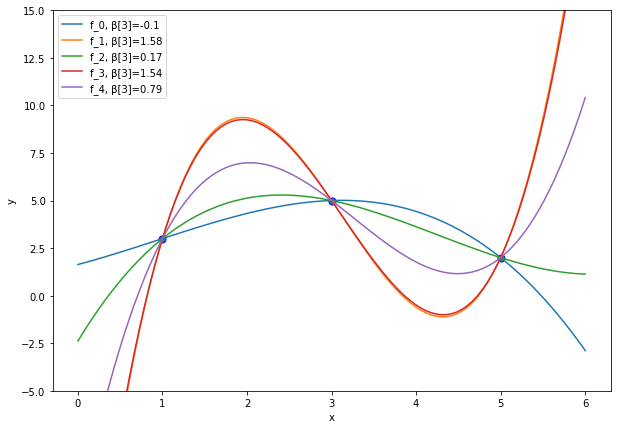

In [11]:
plt.figure(figsize=(10, 7))
x = np.linspace(0, 6, 100)
β = get_beta(U,Σ,V,random = False)
f_x = ϕ(x).T@β
plt.plot(x, f_x, label="f_0"+", β[3]="+str(np.round(β[3],2)))
for i in range(1,5):
    β = get_beta(U,Σ,V)
    f_x = ϕ(x).T@β
    plt.plot(x, f_x, label="f_"+str(i)+", β[3]="+str(np.round(β[3],2)))
plt.scatter(D, y, edgecolor='b', s=50)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim((-5, 15))
plt.legend(loc="best")
plt.show()